In [4]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os



# Set paths
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))

figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"


    

## Explore functional profiles in S1-S4 regions 

In [5]:
Data, regions_all = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions_all], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


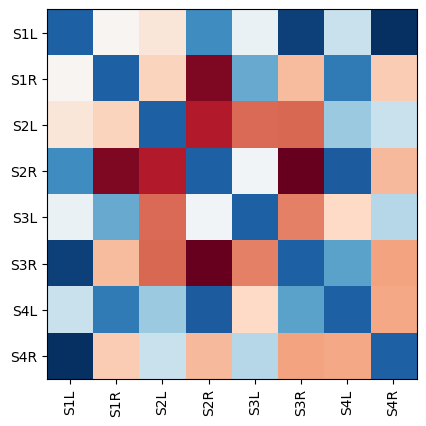

In [6]:
# Correlate profiles between subregions
# Select subregions
regions = ['S1L', 'S1R', 'S2L', 'S2R', 'S3L', 'S3R', 'S4L', 'S4R']
cmap = plt.get_cmap('RdBu_r')
corr = np.corrcoef(Data[regions].to_numpy().T)
# Set diagonal to zero
np.fill_diagonal(corr, 0)
plt.imshow(corr, cmap=cmap)
plt.xticks(np.arange(len(regions)), regions, rotation=90)
plt.yticks(np.arange(len(regions)), regions)
plt.savefig(figure_path + 'social_network_correlation.png', dpi=300)



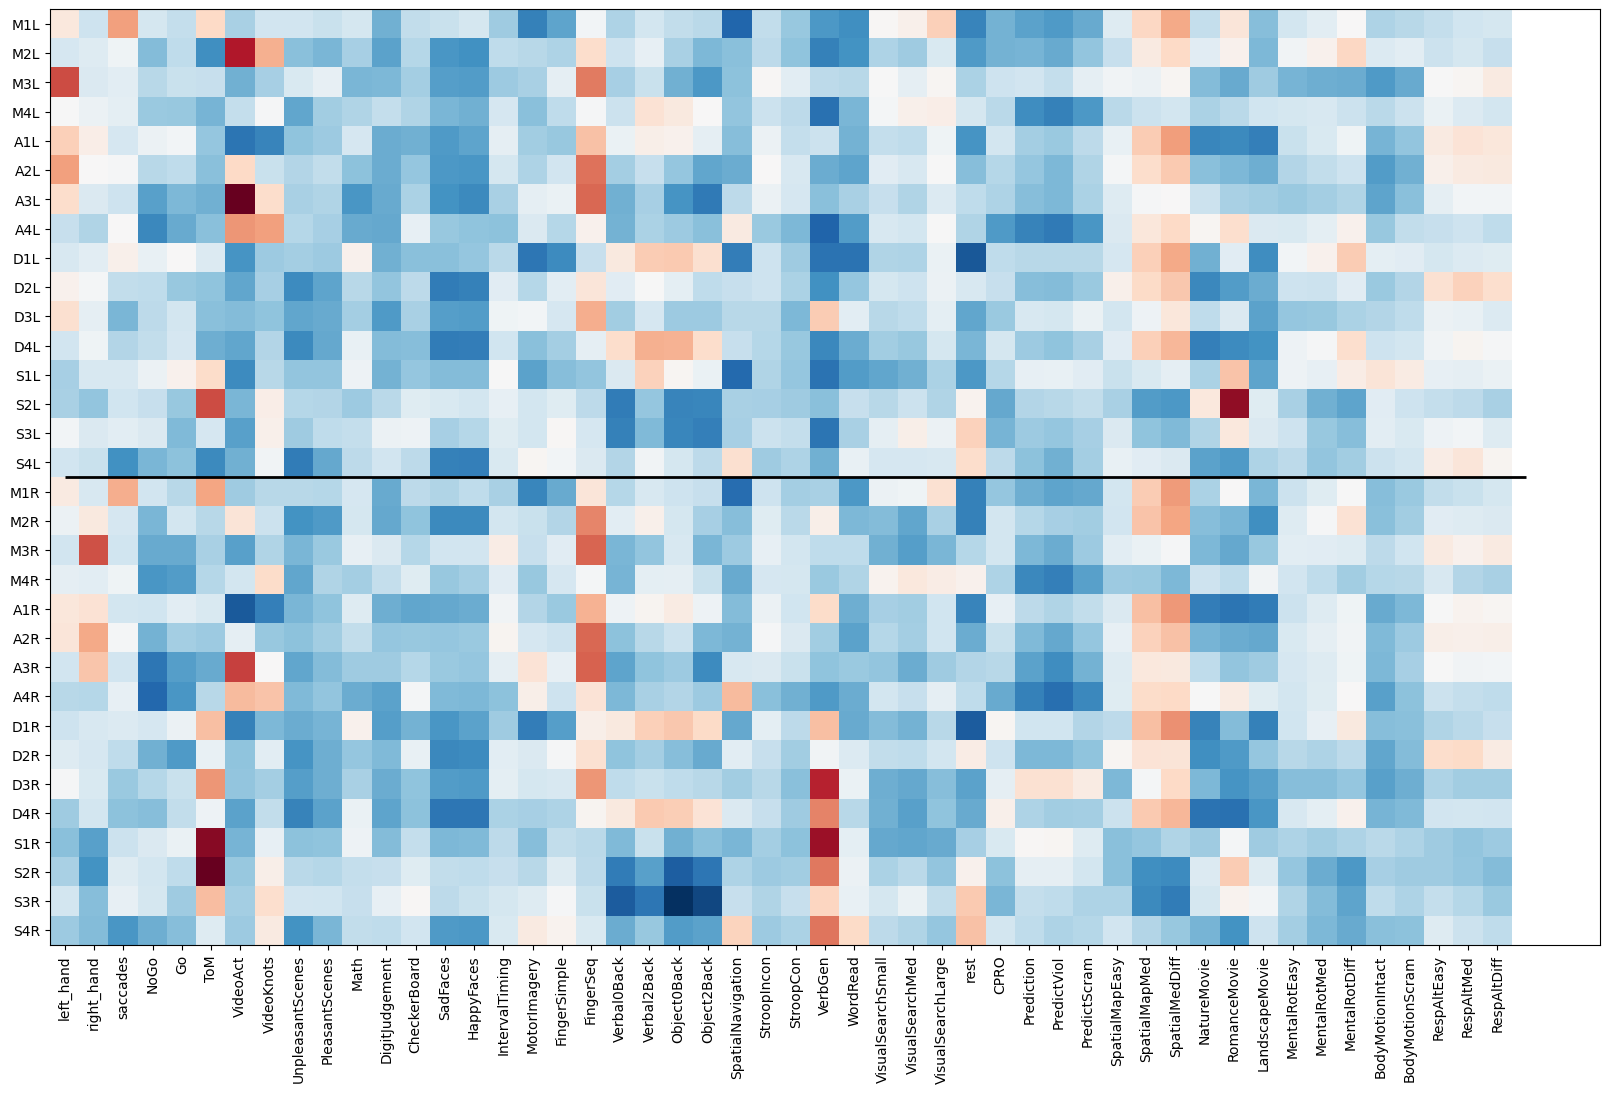

In [7]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions_all)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions_all)), regions_all)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions_all) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)
plt.savefig(f'{figure_path}/feature_matrix.png', dpi=300)


In [8]:
regions = ['S1L','S1R','S2L','S2R','S3L','S3R','S4L','S4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]

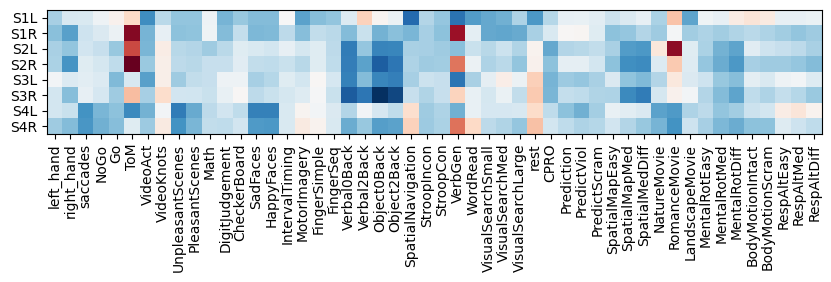

In [9]:
# Only select rows where the region is in the list
Feature_regions = Features.loc[regions]
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(10, 10))
plt.imshow(Features.loc[regions], cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

plt.savefig(f'{figure_path}/feature_matrix_social.png', dpi=300)



In [10]:
# Melt
T = Feature_regions.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


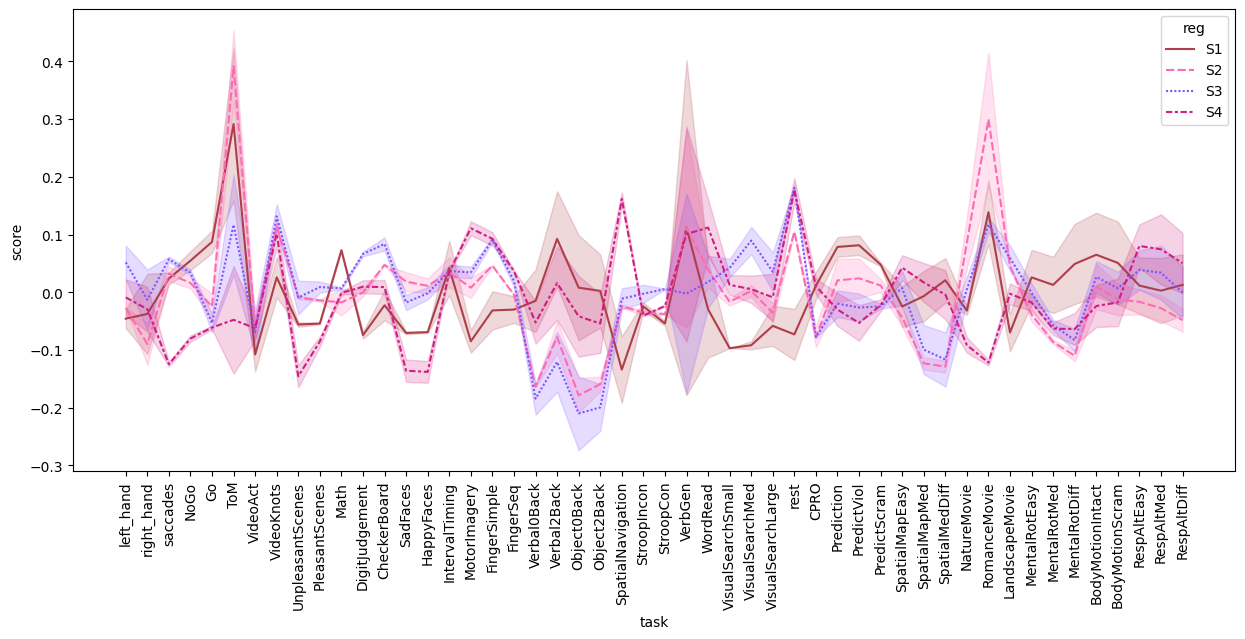

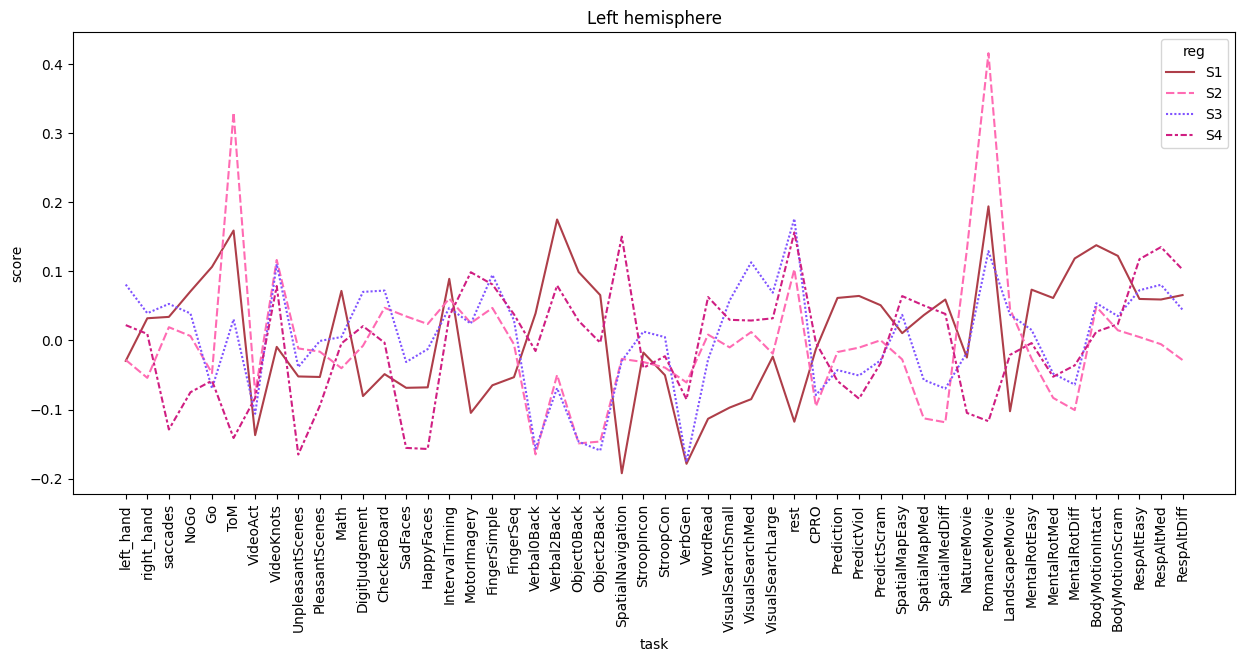

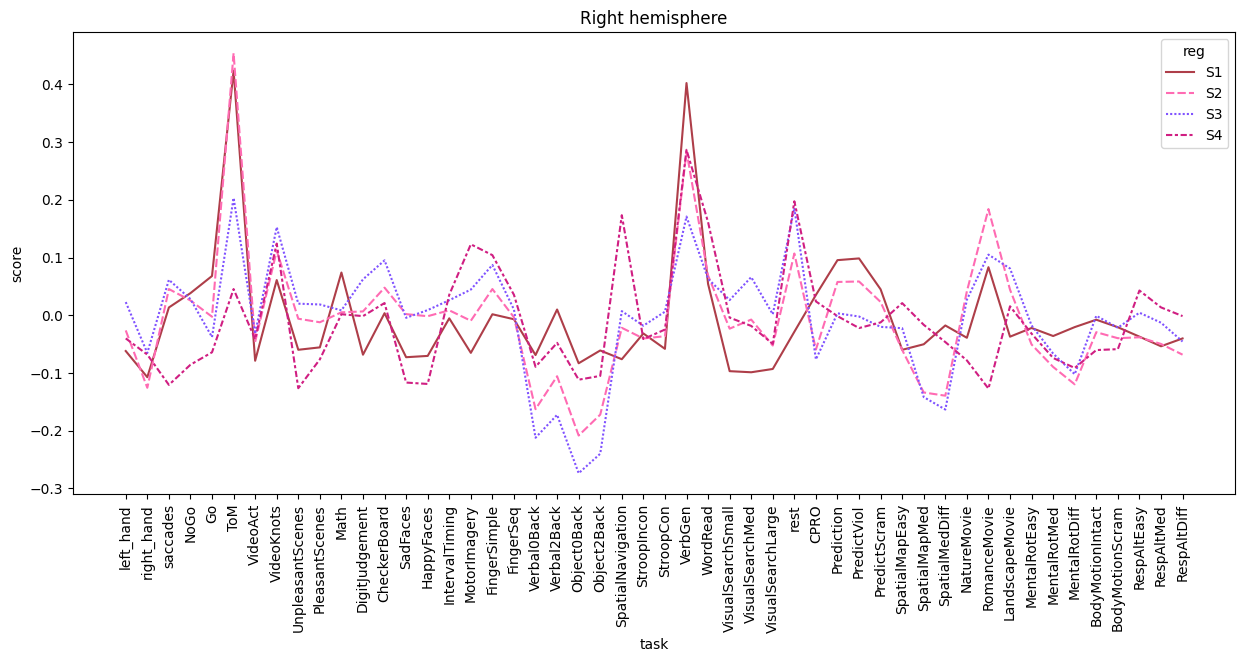

In [11]:
plt.figure(figsize=(15, 6))
sb.lineplot(data=T, x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['S1', 'S2', 'S3', 'S4'], style='reg')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side=='L'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['S1', 'S2', 'S3', 'S4'], style='reg')
plt.title('Left hemisphere')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side == 'R'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['S1', 'S2', 'S3', 'S4'], style='reg')
plt.title('Right hemisphere')
xt = plt.xticks(rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

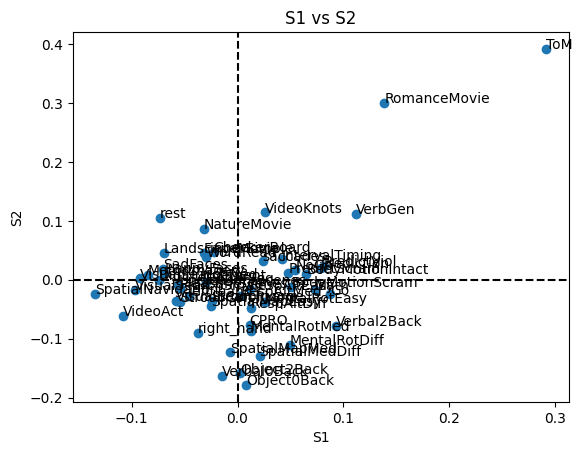

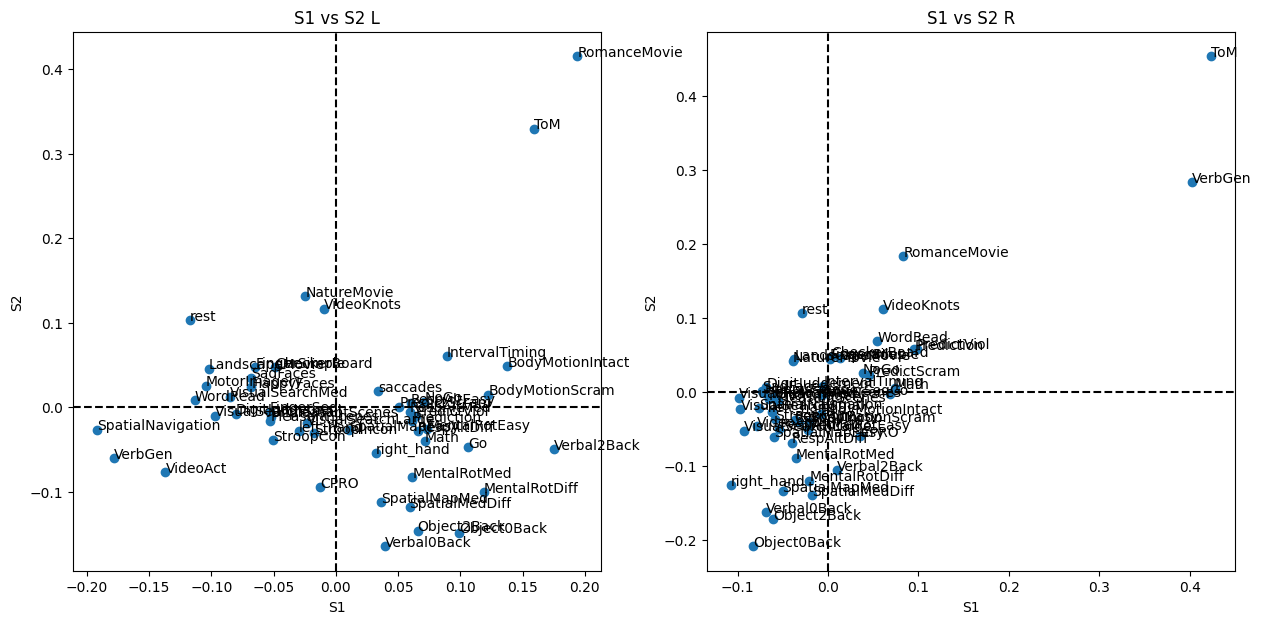

In [16]:
compare = ['S1', 'S2']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')
plt.savefig(f'{figure_path}/feature_scatter_social_{compare[0]}_vs_{compare[1]}.png', dpi=300)

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

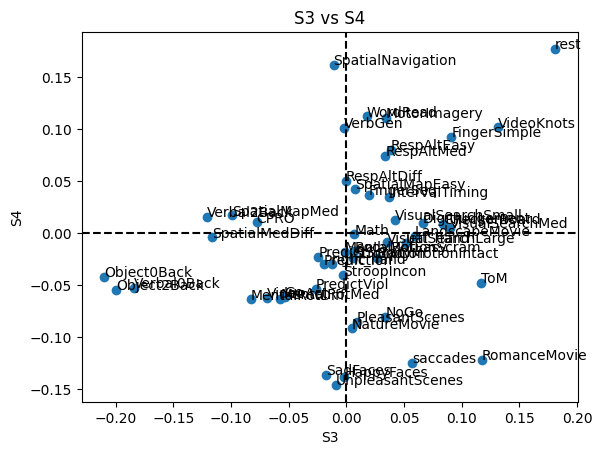

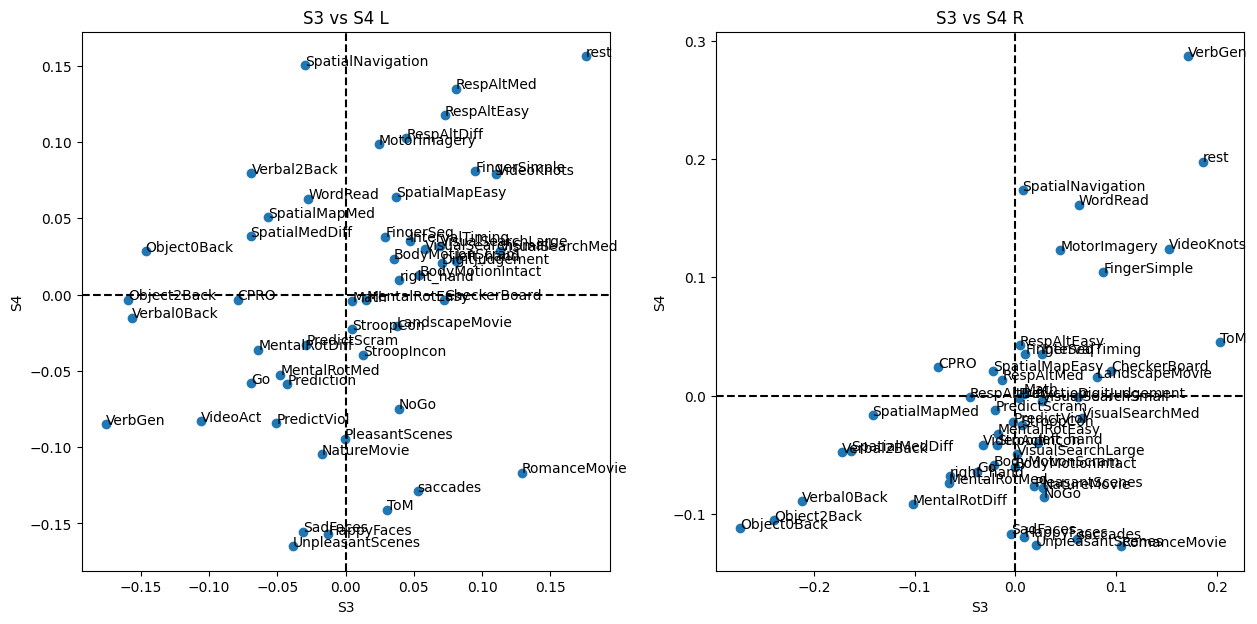

In [17]:
compare = ['S3', 'S4']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')
plt.savefig(
    f'{figure_path}/feature_scatter_social_{compare[0]}_vs_{compare[1]}.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

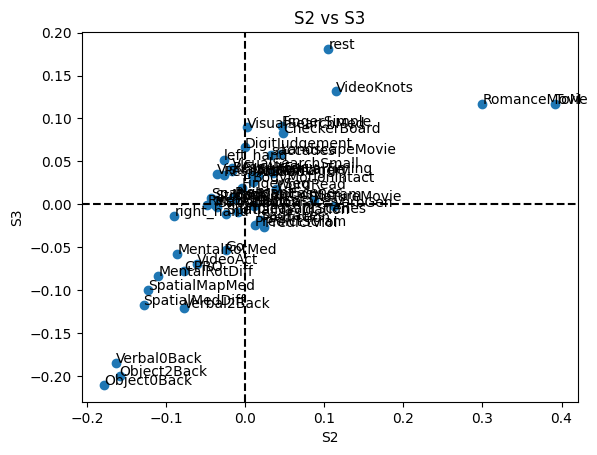

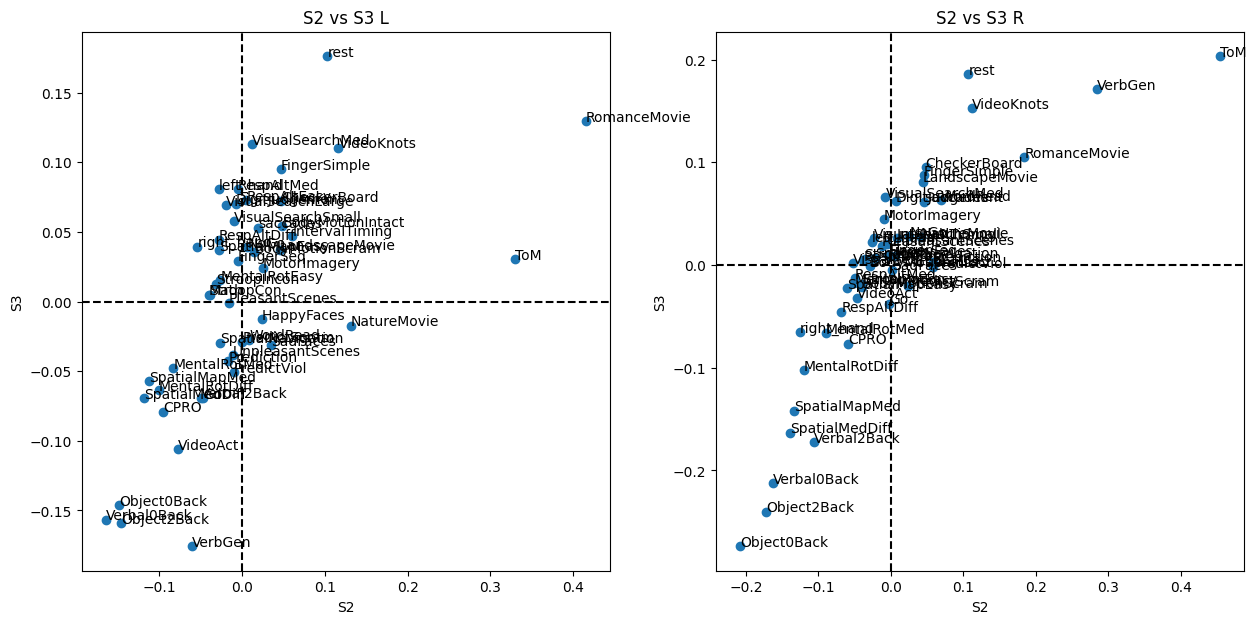

In [18]:
compare = ['S2', 'S3']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')
plt.savefig(
    f'{figure_path}/feature_scatter_social_{compare[0]}_vs_{compare[1]}.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:121: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

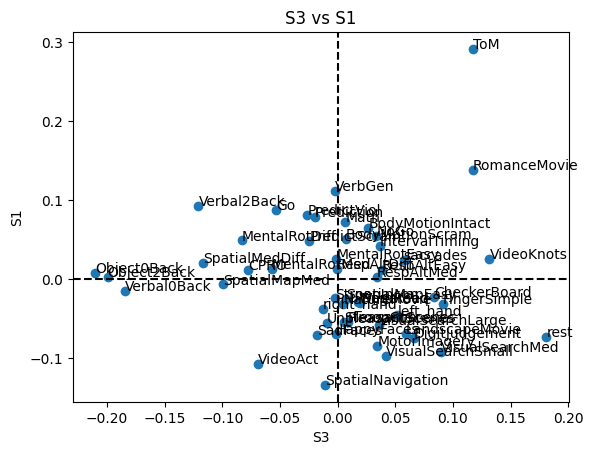

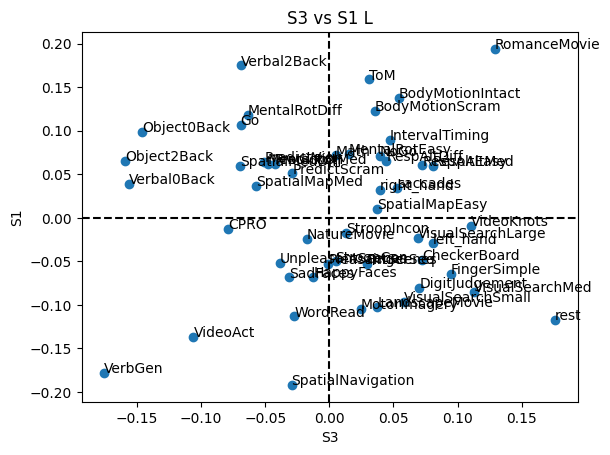

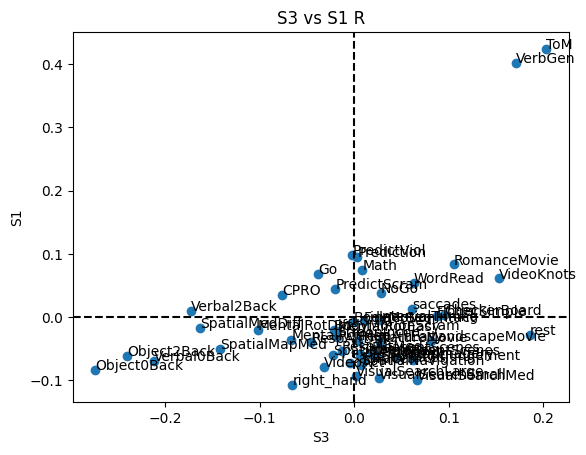

In [11]:
compare = ['S3', 'S1']
fm.scatter_plot(compare, T)
fm.scatter_plot(compare, T, side='L')
fm.scatter_plot(compare, T, side='R')


# Compare left and right hemisphere

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_35677/731489495.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_35677/731489495.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_35677/731489495.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_35677/731489495.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future ver

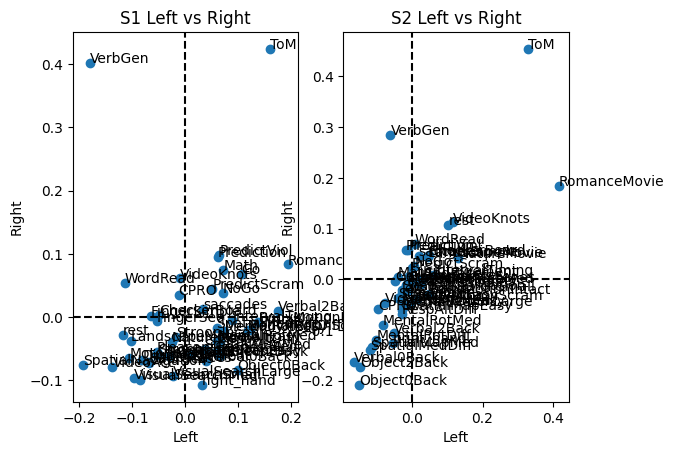

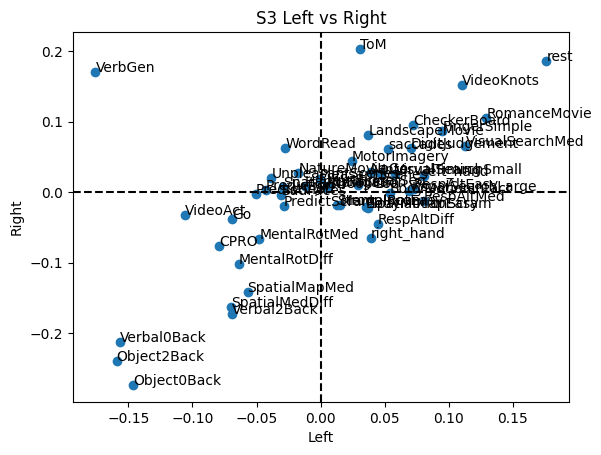

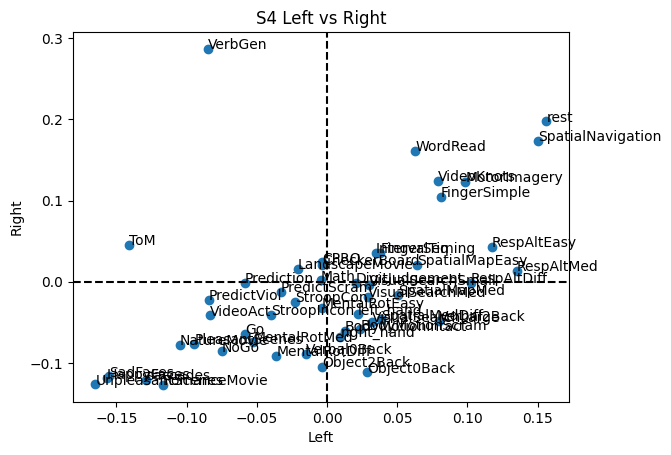

In [66]:
fm.scatter_plot_hemispheres('S1', T)
fm.scatter_plot_hemispheres('S2', T)
fm.scatter_plot_hemispheres('S3', T)
fm.scatter_plot_hemispheres('S4', T)
